# MVPC Pipeline — Running MVPC on Synthetic Data
This notebook loads the synthetic datasets generated in `01_generate_synthetic_data.ipynb` and runs the full MVPC pipeline:
- missingness‑parent detection  
- initial skeleton extraction  
- corrected skeleton search  
- orientation of the corrected skeleton  


In [1]:
import sys
import os

# Path to the project root (one level above the notebooks folder)
project_root = os.path.abspath("..")

# Add to Python path if not already present
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)

Project root added: c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New


In [2]:
%load_ext autoreload
%autoreload 2


In [3]:

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm


from mvpc.mvpc_pipeline import MVPC
from mvpc.ci_tests.gauss_permc import gauss_ci_td, gauss_ci_permc
from mvpc.ci_tests.gauss_drw import gauss_ci_drw

# binary tests
from mvpc.ci_tests.bin_drw import bin_ci_drw
from mvpc.ci_tests.bin_permc import bin_ci_permc
from mvpc.ci_tests.bin_td import bin_ci_td  

from mvpc.missingness import detection_prt_m
from mvpc.skeleton import skeleton2


In [4]:
# Load MAR Dataset
data_mar = pd.read_csv("../data/synthetic_data_csv_files/missing_mar.csv").values 
data_mar.shape

(2000, 20)

In [5]:
# Load MNAR Dataset
data_mnar = pd.read_csv("../data/synthetic_data_csv_files/missing_mnar.csv").values 
data_mnar.shape

(2000, 20)

In [6]:
# Run MVPC on MAR / MNAR Data

mvpc = MVPC(
    indep_test=gauss_ci_td,
    corr_test=gauss_ci_permc,
    alpha=0.05
)

res_mar = mvpc.run(data_mar)
res_mnar = mvpc.run(data_mnar)

print("=== MAR prt_m ===")
print("m:", res_mar["prt_m"]["m"])
print("prt:", res_mar["prt_m"]["prt"])

print("=== MNAR prt_m ===")
print("m:", res_mnar["prt_m"]["m"])
print("prt:", res_mnar["prt_m"]["prt"])

print("MAR corrected skeleton:", res_mar["G_corrected"].shape)
print("MNAR corrected skeleton:", res_mnar["G_corrected"].shape)


[Step 1] m_inds (vars with NaNs): [1, 2, 5, 7, 14, 16]


Detecting parents of missingness indicators:   0%|          | 0/6 [00:00<?, ?it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


Detecting parents of missingness indicators:  33%|███▎      | 2/6 [00:00<00:00, 15.35it/s]

[Step 1] R_ind=2, parents=[np.int64(8)]


[Step 1] R_ind=5, parents=[np.int64(0)]


Detecting parents of missingness indicators:  67%|██████▋   | 4/6 [00:00<00:00, 14.89it/s]

[Step 1] R_ind=7, parents=[np.int64(4), np.int64(11), np.int64(17)]


[Step 1] R_ind=14, parents=[np.int64(0), np.int64(11)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00, 15.58it/s]


[Step 1] R_ind=16, parents=[np.int64(13)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 5, 7, 14, 16]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(8)], 5: [np.int64(0)], 7: [np.int64(4), np.int64(11), np.int64(17)], 14: [np.int64(0), np.int64(11)], 16: [np.int64(13)]}


[Step 1] m_inds (vars with NaNs): [1, 2, 4, 7, 8, 15]


Detecting parents of missingness indicators:   0%|          | 0/6 [00:00<?, ?it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


Detecting parents of missingness indicators:  33%|███▎      | 2/6 [00:00<00:00, 14.37it/s]

[Step 1] R_ind=2, parents=[np.int64(8)]


[Step 1] R_ind=4, parents=[np.int64(16)]


Detecting parents of missingness indicators:  67%|██████▋   | 4/6 [00:00<00:00,  9.36it/s]

[Step 1] R_ind=7, parents=[np.int64(4), np.int64(11)]


[Step 1] R_ind=8, parents=[np.int64(10)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00,  8.91it/s]


[Step 1] R_ind=15, parents=[np.int64(4), np.int64(5)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 4, 7, 8, 15]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(8)], 4: [np.int64(16)], 7: [np.int64(4), np.int64(11)], 8: [np.int64(10)], 15: [np.int64(4), np.int64(5)]}


=== MAR prt_m ===
m: [1, 2, 5, 7, 14, 16]
prt: {1: [np.int64(15)], 2: [np.int64(8)], 5: [np.int64(0)], 7: [np.int64(4), np.int64(11), np.int64(17)], 14: [np.int64(0), np.int64(11)], 16: [np.int64(13)]}
=== MNAR prt_m ===
m: [1, 2, 4, 7, 8, 15]
prt: {1: [np.int64(15)], 2: [np.int64(8)], 4: [np.int64(16)], 7: [np.int64(4), np.int64(11)], 8: [np.int64(10)], 15: [np.int64(4), np.int64(5)]}
MAR corrected skeleton: (20, 20)
MNAR corrected skeleton: (20, 20)


In [7]:
print("MAR corrected skeleton:")
print(res_mar["G_corrected"])


MAR corrected skeleton:
[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [8]:
print("MNAR corrected skeleton:")
print(res_mnar["G_corrected"])


MNAR corrected skeleton:
[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_skeleton(G, title="Graph"):
    """
    Visualize a skeleton adjacency matrix using networkx.
    G should be a (p x p) numpy array of 0/1 entries.
    """
    p = G.shape[0]
    G_nx = nx.Graph()

    # add nodes
    for i in range(p):
        G_nx.add_node(i)

    # add edges
    for i in range(p):
        for j in range(i+1, p):
            if G[i, j] == 1:
                G_nx.add_edge(i, j)

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G_nx, seed=42)  # nice layout
    nx.draw(
        G_nx,
        pos,
        with_labels=True,
        node_size=800,
        node_color="#87CEEB",
        font_size=12,
        width=2,
        edge_color="#555555"
    )
    plt.title(title)
    plt.show()


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(G, title="Adjacency Matrix"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(G, cmap="Blues", square=True, cbar=False)
    plt.title(title)
    plt.show()


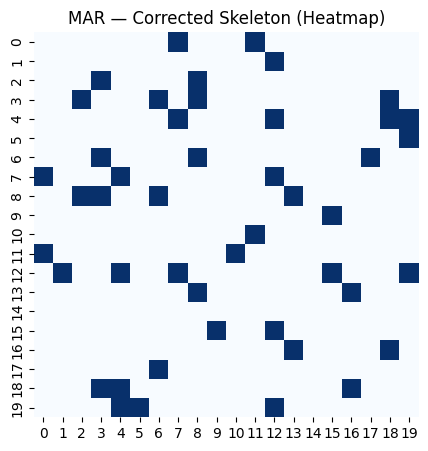

In [11]:
plot_heatmap(res_mar["G_corrected"], "MAR — Corrected Skeleton (Heatmap)")


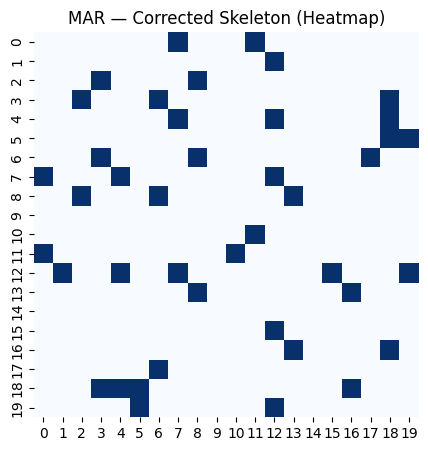

In [12]:
plot_heatmap(res_mnar["G_corrected"], "MAR — Corrected Skeleton (Heatmap)")

In [13]:
data_mar = pd.read_csv("../data/synthetic_data_csv_files/missing_mar.csv").values
data_mnar = pd.read_csv("../data/synthetic_data_csv_files/missing_mnar.csv").values

print(data_mar.shape, data_mnar.shape)


(2000, 20) (2000, 20)


In [14]:
# MAR

gt_mar = pd.read_csv("../data/synthetic_data_csv_files/missingness_structure_mar.csv")

# Convert 1‑based → 0‑based
true_ms_mar = (gt_mar["m_ind"]).tolist()
true_prt_ms_mar = (gt_mar["parent_m_ind"]).tolist()

true_prt_mar = {m: p for m, p in zip(true_ms_mar, true_prt_ms_mar)}
true_prt_mar


{2: 8, 7: 4, 1: 15, 5: 0, 16: 13, 14: 11}

In [15]:
# MNAR

gt_mnar = pd.read_csv("../data/synthetic_data_csv_files/missingness_structure_mnar.csv")

true_ms_mnar = (gt_mnar["m_ind"]).tolist()
true_prt_ms_mnar = (gt_mnar["parent_m_ind"]).tolist()

true_prt_mnar = {m: p for m, p in zip(true_ms_mnar, true_prt_ms_mnar)}
true_prt_mnar


{2: 8, 7: 4, 1: 15, 8: 10, 4: 16, 15: 5}

In [16]:
est_prt_mar = res_mar["prt_m"]["prt"]
est_prt_mnar = res_mnar["prt_m"]["prt"]


In [17]:
def evaluate_missingness_parents(true_prt, est_prt):
    rows = []
    for m, true_parent in true_prt.items():
        est = est_prt.get(m, [])
        rows.append({
            "R_ind": m,
            "true_parent": true_parent,
            "estimated_parents": est,
            "correct": true_parent in est
        })
    return pd.DataFrame(rows)


In [18]:
eval_mar = evaluate_missingness_parents(true_prt_mar, est_prt_mar)
eval_mar


,R_ind,true_parent,estimated_parents,correct
0,2,8,[8],True
1,7,4,"[4, 11, 17]",True
2,1,15,[15],True
3,5,0,[0],True
4,16,13,[13],True
5,14,11,"[0, 11]",True


In [19]:
eval_mnar = evaluate_missingness_parents(true_prt_mnar, est_prt_mnar)
eval_mnar


,R_ind,true_parent,estimated_parents,correct
0,2,8,[8],True
1,7,4,"[4, 11]",True
2,1,15,[15],True
3,8,10,[10],True
4,4,16,[16],True
5,15,5,"[4, 5]",True


In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_missingness_graph(prt_m, p, figsize=(10, 6)):
    """
    Visualize the missingness-parent graph recovered by MVPC.

    prt_m: dict with keys:
        - "m": list of variables with missingness
        - "prt": dict mapping R_ind -> list of parent indices
    p: number of variables in the dataset
    """

    G = nx.DiGraph()

    # Add X nodes
    for i in range(p):
        G.add_node(f"X{i}", color="skyblue", style="filled")

    # Add R nodes only for variables with missingness
    for r in prt_m["m"]:
        G.add_node(f"R{r}", color="lightcoral", style="filled")

    # Add edges X_k -> R_j
    for r, parents in prt_m["prt"].items():
        for parent in parents:
            G.add_edge(f"X{parent}", f"R{r}")

    # Layout: X nodes on left, R nodes on right
    pos = {}
    xs = [n for n in G.nodes if n.startswith("X")]
    rs = [n for n in G.nodes if n.startswith("R")]

    for i, x in enumerate(xs):
        pos[x] = (-1, -i)

    for i, r in enumerate(rs):
        pos[r] = (1, -i)

    # Draw
    plt.figure(figsize=figsize)
    colors = [G.nodes[n]["color"] for n in G.nodes]

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=colors,
        node_size=1200,
        font_size=10,
        arrowsize=20,
        edge_color="gray",
    )

    plt.title("Missingness Graph (Parents of Missingness Indicators)")
    plt.axis("off")
    plt.show()


[Step 1] m_inds (vars with NaNs): [1, 2, 5, 7, 14, 16]


Detecting parents of missingness indicators:  17%|█▋        | 1/6 [00:00<00:00,  7.83it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


Detecting parents of missingness indicators:  33%|███▎      | 2/6 [00:00<00:00,  8.63it/s]

[Step 1] R_ind=2, parents=[np.int64(8)]


[Step 1] R_ind=5, parents=[np.int64(0)]


Detecting parents of missingness indicators:  67%|██████▋   | 4/6 [00:00<00:00,  8.69it/s]

[Step 1] R_ind=7, parents=[np.int64(4), np.int64(11), np.int64(17)]


[Step 1] R_ind=14, parents=[np.int64(0), np.int64(11)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00,  9.65it/s]


[Step 1] R_ind=16, parents=[np.int64(13)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 5, 7, 14, 16]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(8)], 5: [np.int64(0)], 7: [np.int64(4), np.int64(11), np.int64(17)], 14: [np.int64(0), np.int64(11)], 16: [np.int64(13)]}


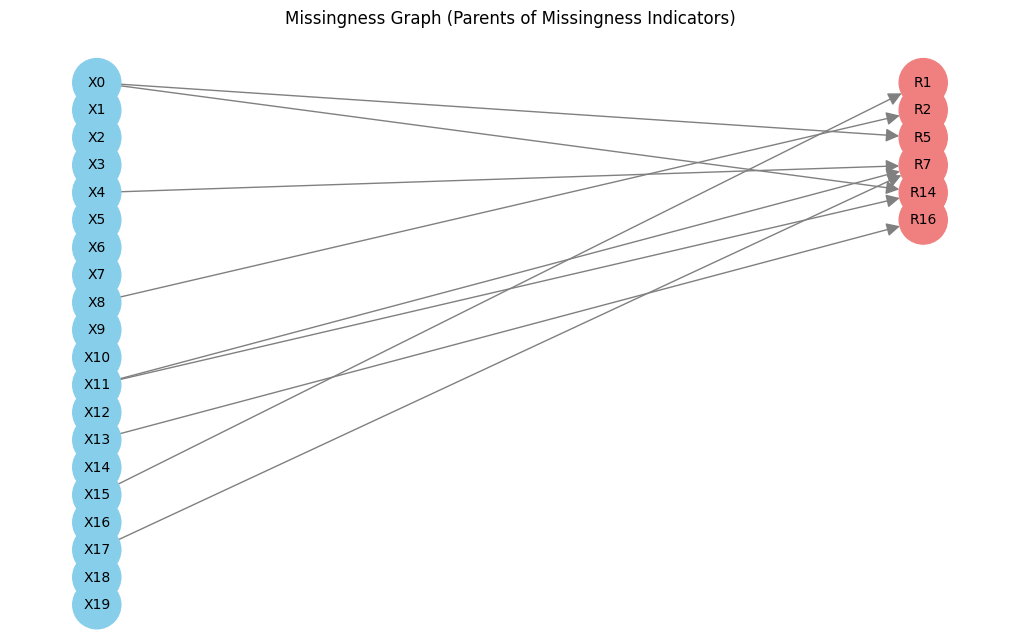

In [21]:
res_mar = mvpc.run(data_mar)
prt_m_mar = res_mar["prt_m"]

plot_missingness_graph(prt_m_mar, p=data_mar.shape[1])


[Step 1] m_inds (vars with NaNs): [1, 2, 4, 7, 8, 15]


Detecting parents of missingness indicators:   0%|          | 0/6 [00:00<?, ?it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


Detecting parents of missingness indicators:  33%|███▎      | 2/6 [00:00<00:00,  9.00it/s]

[Step 1] R_ind=2, parents=[np.int64(8)]


Detecting parents of missingness indicators:  50%|█████     | 3/6 [00:00<00:00,  8.02it/s]

[Step 1] R_ind=4, parents=[np.int64(16)]


Detecting parents of missingness indicators:  67%|██████▋   | 4/6 [00:00<00:00,  4.03it/s]

[Step 1] R_ind=7, parents=[np.int64(4), np.int64(11)]


[Step 1] R_ind=8, parents=[np.int64(10)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00,  6.44it/s]


[Step 1] R_ind=15, parents=[np.int64(4), np.int64(5)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 4, 7, 8, 15]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(8)], 4: [np.int64(16)], 7: [np.int64(4), np.int64(11)], 8: [np.int64(10)], 15: [np.int64(4), np.int64(5)]}


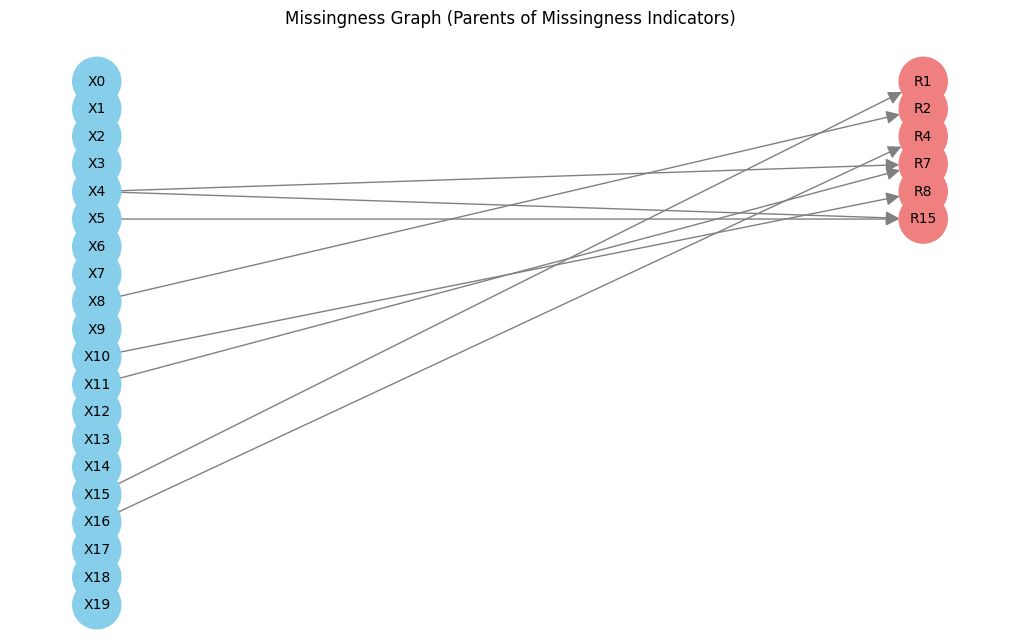

In [22]:
res_mnar = mvpc.run(data_mnar)
prt_m_mnar = res_mnar["prt_m"]

plot_missingness_graph(prt_m_mnar, p=data_mnar.shape[1])


In [23]:
import time
import pandas as pd

def run_mvpc_with(name, indep_test, corr_test, data, alpha=0.05):
    mvpc = MVPC(
        indep_test=indep_test,
        corr_test=corr_test,
        alpha=alpha,
    )

    t0 = time.time()
    res = mvpc.run(data)
    runtime = time.time() - t0

    return {
        "name": name,
        "res": res,
        "runtime": runtime,
    }


In [24]:
def evaluate_prt_m(true_prt_m, est_prt_m):
    """
    true_prt_m: dict {m_ind: [true_parents]}
    est_prt_m:  dict with keys:
        - "m": list of R indices
        - "prt": dict mapping R_ind -> list of estimated parents
    """

    rows = []

    for m_ind, true_parents in true_prt_m.items():
        est_parents = est_prt_m["prt"].get(m_ind, [])
        # sort for stable comparison
        true_set = sorted(true_parents)
        est_set = sorted(est_parents)

        correct = (set(true_set) == set(est_set))

        rows.append({
            "R_ind": m_ind,
            "true_parents": true_set,
            "estimated_parents": est_set,
            "correct": correct,
        })

    df = pd.DataFrame(rows)
    exact_match_rate = df["correct"].mean()

    return df, exact_match_rate


In [25]:
import pandas as pd

def load_true_prt_m(csv_path):
    df = pd.read_csv(csv_path)  # columns: m_ind, parent_m_ind
    true_prt = {}
    for _, row in df.iterrows():
        m = int(row["m_ind"])
        p = int(row["parent_m_ind"])
        true_prt.setdefault(m, []).append(p)
    return true_prt


In [26]:
# 1) Load true MAR structure
true_prt_mar = load_true_prt_m("MAR.csv")  # adjust path

# 2) Run MVPC with PermC
permc_run = run_mvpc_with(
    name="PermC",
    indep_test=gauss_ci_td,
    corr_test=gauss_ci_permc,
    data=data_mar,
)

# 3) Run MVPC with DRW
drw_run = run_mvpc_with(
    name="DRW",
    indep_test=gauss_ci_td,
    corr_test=gauss_ci_drw,
    data=data_mar,
)

# 4) Evaluate both
permc_df, permc_acc = evaluate_prt_m(true_prt_mar, permc_run["res"]["prt_m"])
drw_df, drw_acc = evaluate_prt_m(true_prt_mar, drw_run["res"]["prt_m"])

print("=== MAR: PermC ===")
print(permc_df)
print("Exact match rate:", permc_acc)
print("Runtime (s):", permc_run["runtime"])

print("\n=== MAR: DRW ===")
print(drw_df)
print("Exact match rate:", drw_acc)
print("Runtime (s):", drw_run["runtime"])


FileNotFoundError: [Errno 2] No such file or directory: 'MAR.csv'